<font colors=black, size='5'> Analyzing Denver's Crime Data</font>

### Neil Oza
</font>



<font size='3'><b>Introduction</b></font>

Hello, my name is Neil Oza. I lived in Denver up until two months ago, and I am currently honing my data science skills. For practice and fun, I decided to see what information I could gleam from Denver's publicly available crime data. I will create some visualizations to help discover trends within the data. My goal is to organize this data in a way that would help law enforcement in Denver allocate their resources more efficiently. let's get started! 



<b><font size=3>Preparing the Data</font></b>

To start, I will import a few useful packages.
<br>
<br>

In [542]:
#Start by importing some useful packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
import folium
from folium import plugins


Next, I'll read in our data into a pandas dataframe

In [543]:
#Next, read in the data, publicly available at https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime
denver_data=pd.read_csv('/users/neiloza/Downloads/crime.csv', parse_dates=True)
denver_data.head(8)

INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2016376978   2016376978521300          5213                       0   
1  20186000994  20186000994239900          2399                       0   
2  20166003953  20166003953230500          2305                       0   
3    201872333    201872333239900          2399                       0   
4   2017411405   2017411405230300          2303                       0   
5    201872837    201872837549900          5499                       0   
6  20186001015  20186001015230400          2304                       0   
7    201870628    201870628570700          5707                       0   

                OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID  \
0  weapon-unlawful-discharge-of          all-other-crimes   
1                   theft-other                   larceny   
2      theft-items-from-vehicle  theft-from-motor-vehicle   
3                   theft-other                   larceny   
4                theft-shoplift                   larceny   
5                    traf-other          all-other-crimes   
6      theft-parts-from-vehicle  theft-from-motor-vehicle   
7          criminal-trespassing          all-other-crimes   

    FIRST_OCCURRENCE_DATE   LAST_OCCURRENCE_DATE          REPORTED_DATE  \
0   6/15/2016 11:31:00 PM                    NaN  6/15/2016 11:31:00 PM   
1  10/11/2017 12:30:00 PM  10/11/2017 4:55:00 PM   1/29/2018 5:53:00 PM   
2     3/4/2016 8:00:00 PM   4/25/2016 8:00:00 AM   4/26/2016 9:02:00 PM   
3    1/30/2018 7:20:00 PM                    NaN  1/30/2018 10:29:00 PM   
4    6/22/2017 8:53:00 PM                    NaN   6/23/2017 4:09:00 PM   
5   1/31/2018 12:44:00 AM                    NaN   1/31/2018 1:29:00 AM   
6    6/1/2017 12:15:00 PM  1/26/2018 12:15:00 PM  1/26/2018 12:24:00 PM   
7    1/30/2018 7:40:00 AM                    NaN  1/30/2018 10:33:00 AM   

            INCIDENT_ADDRESS      GEO_X      GEO_Y     GEO_LON    GEO_LAT  \
0                        NaN  3193983.0  1707251.0 -104.809881  39.773188   
1                        NaN  3201943.0  1711852.0 -104.781434  39.785649   
2        2932 S JOSEPHINE ST  3152762.0  1667011.0 -104.957381  39.663490   
3        705 S COLORADO BLVD  3157162.0  1681320.0 -104.941440  39.702698   
4             2810 E 1ST AVE  3153211.0  1686545.0 -104.955370  39.717107   
5      2100 BLOCK E 17TH AVE  3151310.0  1696020.0 -104.961928  39.743149   
6         995 N FEDERAL BLVD  3133441.0  1692147.0 -105.025543  39.732790   
7  E SPEER BLVD / N GRANT ST  3145202.0  1688799.0 -104.983794  39.723424   

   DISTRICT_ID  PRECINCT_ID             NEIGHBORHOOD_ID  IS_CRIME  IS_TRAFFIC  
0            5          521                   montbello         1           0  
1            5          522  gateway-green-valley-ranch         1           0  
2            3          314                   wellshire         1           0  
3            3          312                     belcaro         1           0  
4            3          311                cherry-creek         1           0  
5            6          622              city-park-west         1           0  
6            1          122                  villa-park         1           0  
7            3          311                       speer         1           0

<br>
There are a total of 19 columns in this dataset. I reached out to the city of Denver and received clarification on several of the columns. I will briefly describe each column below. I will go slightly out of order to provide a more cohesive explanation
<br>
<br>
<b>OFFENSE_ID</b> is a unique identifier for each offense. It is generated by concatanating (combining) the INCIDENT_ID, OFFENSE_CODE,and OFFENSE_CODE_EXTENSION. It provides a unique identifier for each offense, as the INCIDENT_ID is duplicated if multiple offenses are committed at once, and OFFENSE_CODE and OFFENSE_CODE_EXTENSION will repeat whenever a particular type of offense is committed

<b>INCIDENT_ID</b> is a unique identifier for an occurence of offenses. most OFFENSE_ID's have unique INCIDENT_ID's, but when a person commits multiple offenses at once, e.g. liquor possession and heroine possession, multiple OFFENSE_ID's will be generated from the INCIDENT_ID

<b>OFFENSE_CODE</b> is a unique identifier for a particular type of offense. things such as criminal mischief, trespassing, larceny, etc. all have different OFFENSE__CODE values to identify them

<b>OFFENSE_CODE_EXTENSION</b> are used to describe a subset of another type crime. for example criminal_mischief- motor vehicle and criminal_mischief-other have the same OFFENSE_CODE but different extensions to differentiate them

<b>OFFENSE_TYPE_ID</b> provides the actual name for the offense in lamens terms. each combination of OFFENSE_CODE and OFFENSE_EXTENSION reference a unique crime. contents of this column include things such as theft-shoplift, criminal-trespassing, and threats-to-injure

<b>OFFENSE_TYPE_CATEGORY</b> provides a more general categorization for crimes. for example, theft-shoplift and theft-from-bldg are both forms of larceny

<b>FIRST_OCCURENCE_DATE</b> is the first possible date/time of the offense. if the time of the offense is known, the LAST_OCCURENCE_DATE will have value NaN. if the time is not known, FIRST_OCCURENCE_DATE will note the first possible time for the offense, and LAST_OCCURENCE_DATE will be last possible time of the offense. This commonly occurs with burglaries, where the exact time of the offense may not be known, but a range of time is known

<b>LAST_OCCURENCE_DATE</b> will be NaN if the exact time of the offense is known and will be an actual time if only a range of possible times is known. in the latter case, it will be the last possible time the offense could have occured.

<b>REPORTED_DATE</b> is the time at which the offense was reported to the police

<b>INCIDENT_ADDRESS</b> provides the location of the offense. not all entries have a value for this column for privacy reasons

<b>GEO_LON</b> and <b>GEO_LAT</b> are the latitudes and longitudes of the location of the offense

<b>GEO_X</b> and <b>GEO_Y</b> are the state plane (city of Denver standard projection) for the offense location. functionally simlar to GEO_LON and GEO_LAT

<b>DISTRICT_ID</b> is the district in charge of handling the offense

<b>PRECINCT_ID</b> is the precinct in charge of handling the offense

<b>NEIGHBORHOOD_ID</b> is the neighborhood the offense occurred in

<b>IS_CRIME</b> states whether the offense was a crime

<b>IS_TRAFFIC</b> states whether the offense was a traffic incident




<br>
<br>
Now that we have an overview of the data, II'll make sure it contains no errors. To start, I'll check for null values

In [544]:
#Check to see how many non-null values present
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455872 entries, 0 to 455871
Data columns (total 19 columns):
INCIDENT_ID               455872 non-null int64
OFFENSE_ID                455872 non-null int64
OFFENSE_CODE              455872 non-null int64
OFFENSE_CODE_EXTENSION    455872 non-null int64
OFFENSE_TYPE_ID           455872 non-null object
OFFENSE_CATEGORY_ID       455872 non-null object
FIRST_OCCURRENCE_DATE     455872 non-null object
LAST_OCCURRENCE_DATE      144476 non-null object
REPORTED_DATE             455872 non-null object
INCIDENT_ADDRESS          411003 non-null object
GEO_X                     452166 non-null float64
GEO_Y                     452166 non-null float64
GEO_LON                   452166 non-null float64
GEO_LAT                   452166 non-null float64
DISTRICT_ID               455872 non-null int64
PRECINCT_ID               455872 non-null int64
NEIGHBORHOOD_ID           455872 non-null object
IS_CRIME                  455872 non-null int64
IS_TRAFFIC

Based on the above output, many of the columns have identical numbers of non-null data. this suggests that the places with null values were left so intentionally. Upon further investigation, it seems that the geographical locations are smetimes left null for privacy reasons and the Last Reported Date column is sometimes left null because the crime occurred at a known time. There don't to be any truly missing values in the dataset, which is good news


Now I'll make sure all Offnse codes are unique. Specifically, I want to make sure every OFFENSE_CODE and OFFENSE_CODE_EXTENSION combination has a unique OFFENSE_TYPE_ID; If this is not the case, that would mean tat sometimes crime 910 sometimes refered to homicide and other times referred to petty theft. It's important that each code references a unique crime for the sake of ,y analysis, so I will validate that now.

In [623]:
temp=display(denver_data.groupby([denver_data.OFFENSE_CODE,denver_data.OFFENSE_CODE_EXTENSION,denver_data.OFFENSE_TYPE_ID]).size())
pd.set_option('display.max_rows',500)
print(temp)

OFFENSE_CODE  OFFENSE_CODE_EXTENSION  OFFENSE_TYPE_ID               
902           0                       homicide-family                      21
910           0                       homicide-negligent                    2
912           0                       homicide-other                      216
1006          0                       kidnap-adult-victim                 209
              1                       kidnap-dv                           161
1099          0                       false-imprisonment                  364
1102          0                       sex-aslt-rape                      2145
              1                       sex-aslt-rape-pot                   134
1109          0                       sex-aslt-non-rape                   503
              1                       sex-aslt-non-rape-pot               116
1199          0                       sex-aslt-w-object                    25
              1                       sex-aslt-w-object-pot              

None


Some offense codes have multiple extensions as indicated by the blank spaces in the OFFENSE_CODE column, but every offense code and extension pair has exactly one offense type id. There are no multiplicities in categorization, so the offense codes are free of errors.
<br>
Next I'll make sure all of the dates are consistent. As a rule, First Occurence Date should come first, Last Occurence Date should come second or not exist, and Reported Date should come last. If this is not the case for a particular row, that row may need to be corrected.

In [ ]:
#convert relevant column data into datetime objects
denver_data['REPORTED_DATE']=pd.to_datetime(denver_data.REPORTED_DATE)
denver_data['FIRST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.FIRST_OCCURRENCE_DATE)
denver_data['LAST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.LAST_OCCURRENCE_DATE)


In [624]:
# Calculate the time difference between first and last occurence date. negative time means the Last Occurence is dated
# before first occurence. those entries have been listed with OFFENSE_ID for easy access
temp=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
temp.loc[:,'OCCURENCE_WINDOW']=temp.LAST_OCCURRENCE_DATE-temp.FIRST_OCCURRENCE_DATE
temp.loc[:,'OCCURENCE_WINDOW']=temp.OCCURENCE_WINDOW.fillna(0)
temp[temp['OCCURENCE_WINDOW']<'0']

OFFENSE_ID FIRST_OCCURRENCE_DATE LAST_OCCURRENCE_DATE  \
43496    2014388104570700   2014-07-26 11:19:00  2014-07-26 10:50:00   
44094    2014373704299901   2014-07-19 05:00:00  2014-07-19 04:00:00   
50290    2014353737299901   2014-07-09 03:45:00  2014-07-09 02:46:00   
53619    2014399282240400   2014-08-01 08:22:00  2014-08-01 06:45:00   
62418    2014596887131302   2014-11-08 22:45:00  2014-11-08 22:30:00   
67451   20149515342240400   2014-07-28 18:27:00  2014-07-28 07:00:00   
100205   2015539465240400   2015-09-17 12:46:00  2015-09-17 08:30:00   
111140    201594326239900   2015-02-16 17:55:00  2015-02-16 16:20:00   
121863   2015752334570700   2015-12-29 23:30:00  2015-12-29 03:30:00   
124008   2016151736355000   2016-03-10 04:15:00  2016-03-10 03:50:00   
138792   2016415601220400   2016-07-02 16:50:00  2016-07-02 06:38:00   
153041   2016751799240400   2016-11-24 11:15:00  2016-11-24 11:00:00   
165511   2017122300240400   2017-02-22 13:35:00  2017-02-22 06:45:00   
172832   2017115679299900   2017-02-19 11:00:00  2017-02-19 07:50:00   
174081    201719458220401   2017-01-10 13:06:00  2017-01-10 03:00:00   
177609   2016820361200600   2016-12-26 20:08:00  2016-12-26 20:00:00   
193924   2017694591240400   2017-10-16 16:00:00  2017-10-16 11:00:00   
202217   2017474579299901   2017-07-18 13:00:00  2017-07-18 12:47:00   
237989   2014596887109900   2014-11-08 22:45:00  2014-11-08 22:30:00   
238332   2014656045240400   2014-12-11 10:40:00  2014-12-11 07:35:00   
241256  20148047026240400   2014-05-12 12:47:00  2014-05-12 10:59:00   
249947   2014353737299902   2014-07-09 03:45:00  2014-07-09 02:46:00   
254909   2014399282353200   2014-08-01 08:22:00  2014-08-01 06:45:00   
264607   2015752334240400   2015-12-29 23:30:00  2015-12-29 03:30:00   
271730    201526840549900   2015-01-15 06:49:00  2015-01-15 06:20:00   
274416    201526819121200   2015-01-15 06:49:00  2015-01-15 06:20:00   
288290   2016751799549900   2016-11-24 11:15:00  2016-11-24 11:00:00   
291549   2016415601299900   2016-07-02 16:50:00  2016-07-02 06:38:00   
296167   2015633506355000   2015-10-29 14:14:00  2015-10-29 14:12:00   
299090    201624902240400   2016-01-12 19:00:00  2016-01-12 00:00:00   
307749   2017474579299900   2017-07-18 13:00:00  2017-07-18 12:47:00   
310586   2017614233240400   2017-09-13 04:10:00  2017-09-13 03:10:00   
311292   2017479079549900   2017-07-20 11:25:00  2017-07-20 11:23:00   
343049    201764699501600   2017-01-29 18:45:00  2017-01-29 13:15:00   
351593   2016415601220200   2016-07-02 16:50:00  2016-07-02 06:38:00   
355031   2016151736359900   2016-03-10 04:15:00  2016-03-10 03:50:00   
355714   2015633506353000   2015-10-29 14:14:00  2015-10-29 14:12:00   
391768   2017759160131302   2017-11-12 03:29:00  2017-11-12 01:30:00   
402635   2017479079410400   2017-07-20 11:25:00  2017-07-20 11:23:00   

             REPORTED_DATE  OCCURENCE_WINDOW  
43496  2014-07-26 11:19:00 -1 days +23:31:00  
44094  2014-07-19 05:27:00 -1 days +23:00:00  
50290  2014-07-09 11:09:00 -1 days +23:01:00  
53619  2014-08-01 08:22:00 -1 days +22:23:00  
62418  2014-11-08 22:49:00 -1 days +23:45:00  
67451  2014-07-29 18:27:00 -1 days +12:33:00  
100205 2015-09-17 13:56:00 -1 days +19:44:00  
111140 2015-02-17 17:50:00 -1 days +22:25:00  
121863 2015-12-30 00:36:00 -1 days +04:00:00  
124008 2016-03-10 04:15:00 -1 days +23:35:00  
138792 2016-07-02 22:43:00 -1 days +13:48:00  
153041 2016-11-24 11:48:00 -1 days +23:45:00  
165511 2017-02-22 19:22:00 -1 days +17:10:00  
172832 2017-03-09 14:07:00 -1 days +20:50:00  
174081 2017-01-10 17:06:00 -1 days +13:54:00  
177609 2016-12-26 22:30:00 -1 days +23:52:00  
193924 2017-10-16 11:05:00 -1 days +19:00:00  
202217 2017-07-21 09:44:00 -1 days +23:47:00  
237989 2014-11-08 22:49:00 -1 days +23:45:00  
238332 2014-12-11 11:13:00 -1 days +20:55:00  
241256 2014-06-04 16:04:00 -1 days +22:12:00  
249947 2014-07-09 11:09:00 -1 days +23:01:00  
254909 2014-08-01 08:22:00 -1 days +22:23:00  
264607

39 entries have last occurence dates that are earlier than first occurence dates. Based on the occurence window, the first and last occurence days should be flipped. The errors seem to be minor, so the data is still usable

In [618]:
#check that reported dates are after first/last occurence dates
temp=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
temp.loc[:,'OCC_REPORT_GAP']=temp.REPORTED_DATE-temp.LAST_OCCURRENCE_DATE
temp.loc[:,'OCC_REPORT_GAP']=temp.OCC_REPORT_GAP.fillna(temp.REPORTED_DATE-temp.FIRST_OCCURRENCE_DATE)
#list all instances where reported date is before either of the occurence dates
temp[temp['OCC_REPORT_GAP']<'0']


OFFENSE_ID FIRST_OCCURRENCE_DATE LAST_OCCURRENCE_DATE  \
8833     2018425958131600   2018-06-25 10:20:00  2018-06-25 14:47:00   
16621    2018409124549900   2018-06-18 17:29:00  2018-06-18 19:51:00   
51546    2014436425357200   2014-08-19 19:20:00  2014-08-19 22:11:00   
51547    2014436425351200   2014-08-19 19:20:00  2014-08-19 22:11:00   
60052    2014560314580100   2014-10-21 17:47:00  2014-10-21 20:42:00   
68219    2014523161549900   2014-10-02 18:43:00  2014-10-02 20:32:00   
79538    2014615636240400   2014-11-19 07:15:00  2014-11-19 07:20:00   
92102    2015279235501500   2015-05-21 16:29:00  2015-05-21 17:32:00   
114628    201597530239900   2015-02-10 20:12:00  2015-02-19 20:12:00   
123693    201628962545500   2016-01-14 20:34:00  2016-01-14 20:52:00   
141459   2016475901230500   2016-07-27 16:00:00  2016-07-27 23:00:00   
147656   2016646912220400   2016-10-09 09:30:00  2016-10-09 10:15:00   
151377   2016680456240400   2016-10-25 23:05:00  2016-10-26 05:30:00   
162991   2016593343351200   2016-09-15 19:20:00  2016-09-15 20:45:00   
163701   2016656613544400   2016-10-13 15:28:00  2016-10-13 17:48:00   
163702   2016656613549900   2016-10-13 15:28:00  2016-10-13 17:48:00   
188081  20175002973361200   2017-06-24 08:00:00  2017-07-06 11:18:00   
191361  20175003365361200   2017-07-24 08:00:00  2017-08-02 14:33:00   
204346    201756793356300   2017-01-26 15:00:00  2017-02-01 09:27:00   
207760  20175000088361200   2017-01-09 07:58:00  2017-01-09 07:59:00   
213455    201855637549900   2018-01-24 00:57:00  2018-01-24 21:30:00   
228382   2014263469549900   2014-05-24 03:06:00  2014-05-24 07:30:00   
228383   2014263469544400   2014-05-24 03:06:00  2014-05-24 07:30:00   
250069  20145003642361200   2014-10-31 08:00:00  2014-11-14 12:57:00   
258318  20145002000239900   2014-04-14 00:01:00  2014-06-20 23:59:00   
284371  20175001609361200   2017-03-16 08:00:00  2017-04-06 12:26:00   
288631  20165004877361200   2016-10-30 08:00:00  2016-11-29 12:29:00   
292615   2016392518549900   2016-06-22 14:32:00  2016-06-22 16:30:00   
295843   2016400617570700   2016-06-25 20:50:00  2016-06-25 21:30:00   
297436    201628962549901   2016-01-14 20:34:00  2016-01-14 20:52:00   
302335   2016442008240400   2016-07-13 01:45:00  2016-07-13 05:00:00   
325682  20165000567131601   2015-12-23 12:00:00  2016-02-16 14:14:00   
347013   2017540840240400   2017-08-22 00:19:00  2017-08-22 15:24:00   
357489   2017130698549900   2017-02-25 18:55:00  2017-02-25 19:49:00   
358322   2015446236400400   2015-08-06 11:28:00  2015-08-06 12:00:00   

             REPORTED_DATE    OCC_REPORT_GAP  
8833   2018-06-25 13:56:00 -1 days +23:09:00  
16621  2018-06-18 18:00:00 -1 days +22:09:00  
51546  2014-08-19 21:47:00 -1 days +23:36:00  
51547  2014-08-19 21:47:00 -1 days +23:36:00  
60052  2014-10-21 18:19:00 -1 days +21:37:00  
68219  2014-10-02 18:55:00 -1 days +22:23:00  
79538  2014-11-19 07:15:00 -1 days +23:55:00  
92102  2015-05-21 16:29:00 -1 days +22:57:00  
114628 2015-02-19 11:45:00 -1 days +15:33:00  
123693 2016-01-14 20:34:00 -1 days +23:42:00  
141459 2016-07-27 16:00:00 -1 days +17:00:00  
147656 2016-10-09 09:40:00 -1 days +23:25:00  
151377 2016-10-26 00:07:00 -1 days +18:37:00  
162991 2016-09-15 19:20:00 -1 days +22:35:00  
163701 2016-10-13 16:07:00 -1 days +22:19:00  
163702 2016-10-13 16:07:00 -1 days +22:19:00  
188081 2017-07-06 11:17:00 -1 days +23:59:00  
191361 2017-08-02 14:32:00 -1 days +23:59:00  
204346 2017-02-01 09:26:00 -1 days +23:59:00  
207760 2017-01-09 07:58:00 -1 days +23:59:00  
213455 2018-01-24 00:57:00 -1 days +03:27:00  
228382 2014-05-24 05:46:00 -1 days +22:16:00  
228383 2014-05-24 05:46:00 -1 days +22:16:00  
250069 2014-11-14 12:56:00 -1 days +23:59:00  
258318 2014-06-20 07:00:00 -1 days +07:01:00  
284371 2017-04-06 12:25:00 -1 days +23:59:00  
288631 2016-11-29 12:28:00 -1 days +23:59:00  
292615 2016-06-22 14:58:00 -1 days +22:28:00  
295843 2016-06-25 20:54:00 -1 days +23:24:00  
297436 2016-

The above entries have Reported Dates earlier than Last Occurence Dates. These entries should be reveiwed for mistakes, but because the error in these entries are small (less than 24 hours) I still consider the data usable.
<br>
<br>
Now Lets make sure all of the Offense ID's are properly constructed from the Incident ID, Offense Code, and Offense Extension


In [626]:
#Determine if there are mistakes in the OFFENSE_ID column
#prepare the columns
temp=denver_data[['OFFENSE_ID','INCIDENT_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION']]
temp.OFFENSE_ID=temp.OFFENSE_ID.astype(str)
temp.INCIDENT_ID=temp.INCIDENT_ID.astype(str)
#the below two columns have to be homogonized to 4 digits and 2 digits respectively
temp.OFFENSE_CODE=temp.OFFENSE_CODE.map('{:04d}'.format).astype(str)
temp.OFFENSE_CODE_EXTENSION=temp.OFFENSE_CODE_EXTENSION.map('{:02d}'.format).astype(str)
#Combine the composite columns and check to make sure it's the same as the OFFENSE_ID
temp['COMBINED_ID']=temp.INCIDENT_ID+temp.OFFENSE_CODE+temp.OFFENSE_CODE_EXTENSION
temp['ID_MATCH']=temp.COMBINED_ID==temp.OFFENSE_ID
#print all rows which have mistakes. will return no rows if there are no errors
print(temp[temp['ID_MATCH']==False])



/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Empty DataFrame
Columns: [OFFENSE_ID, INCIDENT_ID, OFFENSE_CODE, OFFENSE_CODE_EXTENSION, COMBINED_ID, ID_MATCH]
Index: []


Since there was no output, there were no errors. All of the Offense ID's are correctly constructed from their composite parts.

Finally, I am only going to analyze crimes in this EDA, so I'll filter out all of the traffic incidents. I will also create a few extra columns at the end of our dataset that will simplify coding later

In [548]:
#filter out traffic accidents from the crime dataset
denver_crime=denver_data[denver_data['IS_CRIME']==1]
denver_crime=denver_crime[denver_crime['REPORTED_DATE']<'2019']
#add columns indicating the hour, day, month, and year eeach crime occurred
denver_crime['HOUR_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).hour
denver_crime['WEEKDAY_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).weekday
denver_crime['MONTH_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).month
denver_crime['YEAR_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).year

denver_crime


INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0        2016376978   2016376978521300          5213                       0   
1       20186000994  20186000994239900          2399                       0   
2       20166003953  20166003953230500          2305                       0   
3         201872333    201872333239900          2399                       0   
4        2017411405   2017411405230300          2303                       0   
5         201872837    201872837549900          5499                       0   
6       20186001015  20186001015230400          2304                       0   
7         201870628    201870628570700          5707                       0   
9       20186001048  20186001048230500          2305                       0   
10        201872390    201872390357200          3572                       0   
11      20186001033  20186001033230400          2304                       0   
12       2016340553   2016340553230300          2303                       0   
13       2017383968   2017383968240400          2404                       0   
14       2016236602   2016236602230300          2303                       0   
15      20176004695  20176004695230500          2305                       0   
16       2017395809   2017395809240400          2404                       0   
17        201869174    201869174570700          5707                       0   
18        201869047    201869047260900          2609                       0   
20        201871171    201871171549900          5499                       0   
23        201871362    201871362549900          5499                       0   
24        201870800    201870800220300          2203                       0   
25        201871768    201871768279900          2799                       0   
26      20188004580  20188004580131600          1316                       0   
27        201871234    201871234549900          5499                       0   
28       2017294559   2017294559240400          2404                       0   
...             ...                ...           ...                     ...   
455840   2018838504   2018838504240400          2404                       0   
455841  20185005553  20185005553360500          3605                       0   
455842   2018857700   2018857700357200          3572                       0   
455843   2018853002   2018853002549900          5499                       0   
455844   2018831464   2018831464131502          1315                       2   
455845  20186012306  20186012306230500          2305                       0   
455846   2018848949   2018848949131300          1313                       0   
455848   2018828431   2018828431299902          2999                       2   
455850   2018850308   2018850308230500          2305                       0   
455851   2018840372   2018840372299900          2999                       0   
455852  20186011951  20186011951230500          2305                       0   
455854  20186012075  20186012075230500          2305                       0   
455856   2018839386   2018839386299901          2999                       1   
455857   2018849302   2018849302549900          5499                       0   
455858   2018844859   2018844859240400          2404                       0   
455859  20186012154  20186012154230500          2305                       0   
455860   2018835201   2018835201549900          5499                       0   
455862   2018852133   2018852133544400          5444                       0   
455863   2018851005   2018851005480300          4803                       0   
455864   2018833650   2018833650239900          2399                       0   
455865   2018833372   2018833372220200          2202                       0   
455867   2018836985   2018836985549900          5499                       0   
455868  20188058998  20188058998260201          2602                       1   
455870  

<br>
<br>
<br>
<font size=3><b>Preliminary Analysis</b></font>

Now that the data's been primed, I will begin my analysis. To start, I'll get a general overview of Denver's crime trend over the past few years. For the record, I'll be using the REPORTED_DATE to timestamp all crimes since that is when the crime comes to a police department's attention.
<br>

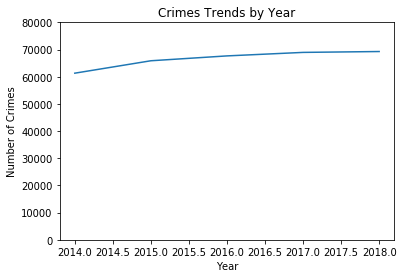

In [550]:
#How has the amount of crime in Denver changed these past five years?
denver_crime['YEAR_REPORTED'].groupby(denver_crime.YEAR_REPORTED).agg('count').plot('line')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes Trends by Year')
plt.ylim(bottom=0,top=80000)
plt.show()

There is a slight upward trend in crime over the past five years. However, the trend seems to be leveling off, and it wouldn't be surprising if crime actually decreased in 2019

Next let's take a look at what types of crimes are being committed in Denver.

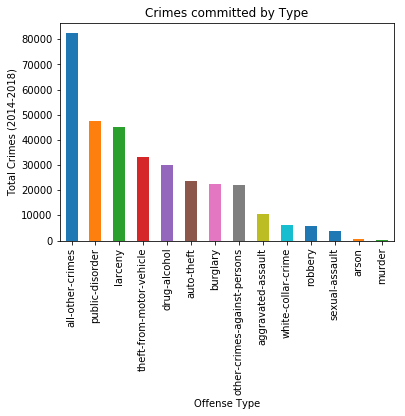

In [57]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

all-other-crimes seems to be the largest category, which we will take a closer look at in a moment. A lot of the large categories of crime seem to be forms of theft (larceny, theft-from-motor-vehicle, auto-theft, burglary). this suggests that theivery is a serious problem in Denver. beyond those crimes, drug-alcohol and public-disorder crimes seem to comprise most of the rest of Denver crimes. Violent crimes, such as assualt, robbery, and murder are low, which is a good sign.

Next, let's take a closer look at the all_other_crimes category.

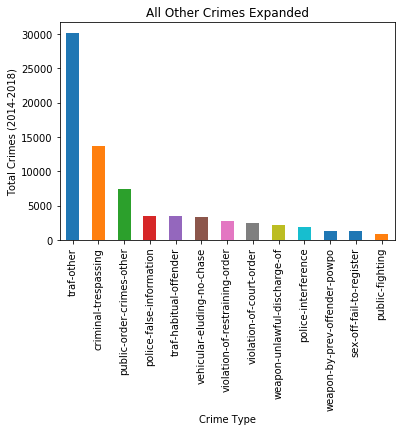

In [551]:
#only listing the top thirteen subdivisions of 'all-other-crimes', for sake of space
temp=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes'].OFFENSE_TYPE_ID.value_counts().head(13).plot(kind='bar')
plt.title('All Other Crimes Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

Most of the crimes in this category seem to be traffic related, but from the label it's difficult to gleam what type of traffic incident is occuring. The other biggest chunk of this misc. category is criminal-trespassing, which if it were it's own category would eclipse aggravated-assualt in terms of number of occurences.

For completeness, let's also take a look at other-crimes-against-persons, which is another composite category, to see what it contains.

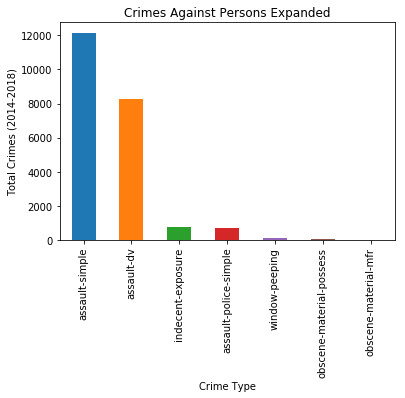

In [628]:
denver_misc_crimes=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].OFFENSE_TYPE_ID.value_counts().plot(kind='bar')
plt.title('Crimes Against Persons Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

other-crimes-against-persons seem to primarily composed of assualts, with a bit of spying and flashing mxed in. Given it's composition, this category will be most influenced by the number of assualts within it, so I'd personally consider the category elated to aggravated-assualt.

<font size=3><b> Crimes Viewed through Various Timeframes</b></font>

Now that I have an overview of the data, I'll begin looking at the data through various time frames. Specifically, I want to see if crimes are seasonal and if certain types of crimes have become more common over time. Let's start by breaking down each type of crime over the last five years.

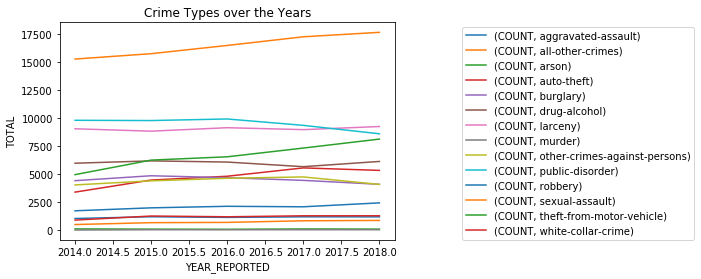

In [552]:
temp=denver_crime[['YEAR_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.YEAR_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='YEAR_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types over the Years')
plt.show()

According to the above graph, all-other-crimes, theft-from-motor-vehicle, and auto-theft all have become more common over the past three years. public-disorder has decreased while other crimes seem to be staying level. Given the increase in auto-theft and theft-from-motor-vehicles, it seems that some sort of PSA reminding people to lock up their vehicles may be warranted.

Next lt's take a look at these crimes by month. Specifically, we are looking to see if certain months have more crimes than others, and if certain types of crimes become more common in certain seasons.

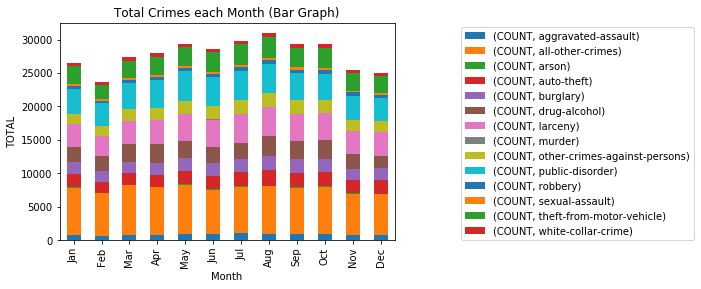

In [556]:
# br graph of crimes by month, to see if crime is seasonal
temp=denver_crime[['MONTH_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.MONTH_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='MONTH_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month (Bar Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.show()

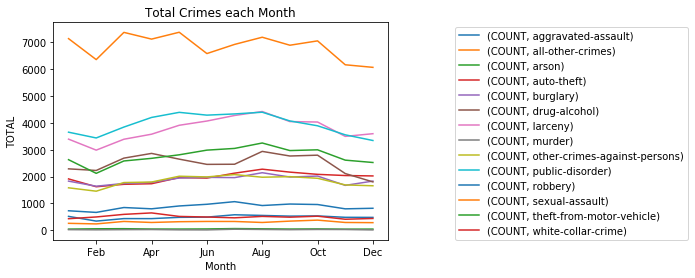

In [557]:
#line graph of crimes by month to see if certain crimes increase noticeably in certain months
temp=denver_crime[['MONTH_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.MONTH_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='MONTH_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month(Line Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Feb','Apr','Jun','Aug','Oct','Dec'))

plt.show()

The first graph shows us that crime seems to be more common in the summer than the winter. February in particular has a very low crime total which makes sense as that month is shorter than the rest. Looking at the line graph, it seems that public disorder, larceny, and theft from motor vehicles are the main culprits of this trend, though few, if any, crimes become more prevalent during the winter.

Now I'll take a look at crimes by day of the week. Specifically, I am curious if certain crimes are more common on the weekends as opposed to weekdays

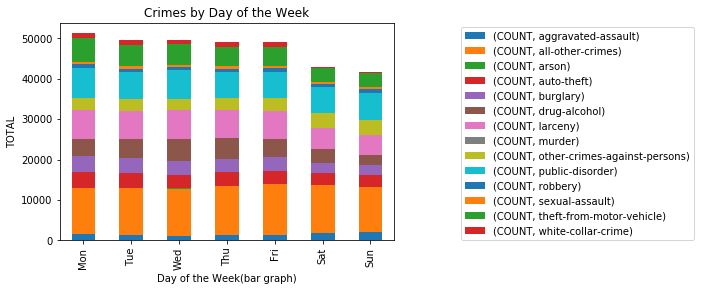

In [558]:
#bar graph of total crimes by day of the week
temp=denver_crime[['WEEKDAY_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.WEEKDAY_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='WEEKDAY_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.xlabel('Day of the Week(bar graph)')
plt.ylabel('TOTAL')
plt.title('Crimes by Day of the Week')
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()





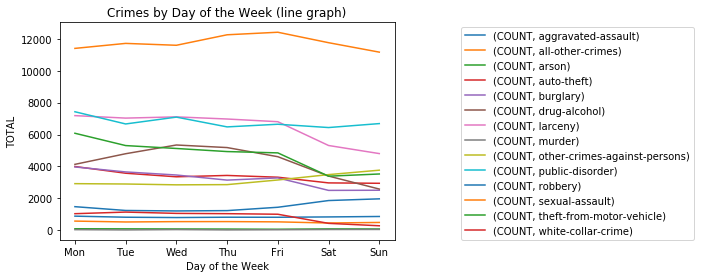

In [559]:
#line graph of each type of crime by day of the week
temp=denver_crime[['WEEKDAY_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.WEEKDAY_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='WEEKDAY_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Crimes by Day of the Week (line graph)')
plt.xlabel('Day of the Week')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()

It appears that crime generally occurs on the weekdays as opposed to weekends (even criminals need a day off). in particular, theft-from-motor-vehicle and larceny crime rates drop precipitously on weekends. drug-alcohol crimes seem to occur from Tuesday through Friday, and interestingly both aggravated-assualt and other-crimes-against-persons occur more frequently on weekends. I'm not quite sure why that is, but further research might reveal the answer.

Now I'll analyze crime by the hour of the day. I'm curious to see if certain crimes are more common in morning hours versus evening hours. note that to keep things clear, I'll be using military time in the below graphs. 6 represents 6 AM, while 18 represents 6 PM.

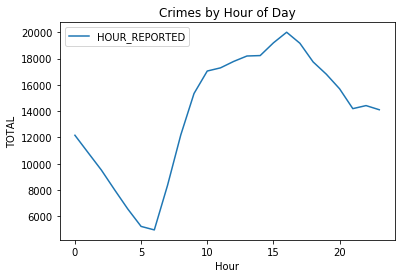

In [560]:
#create lineplot to see crime trends of total crimes throughout the day
temp=denver_crime[['HOUR_REPORTED']].groupby([denver_crime.HOUR_REPORTED]).agg('count')
temp.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('TOTAL')
plt.title('Crimes by Hour of Day')
plt.show()

No handles with labels found to put in legend.


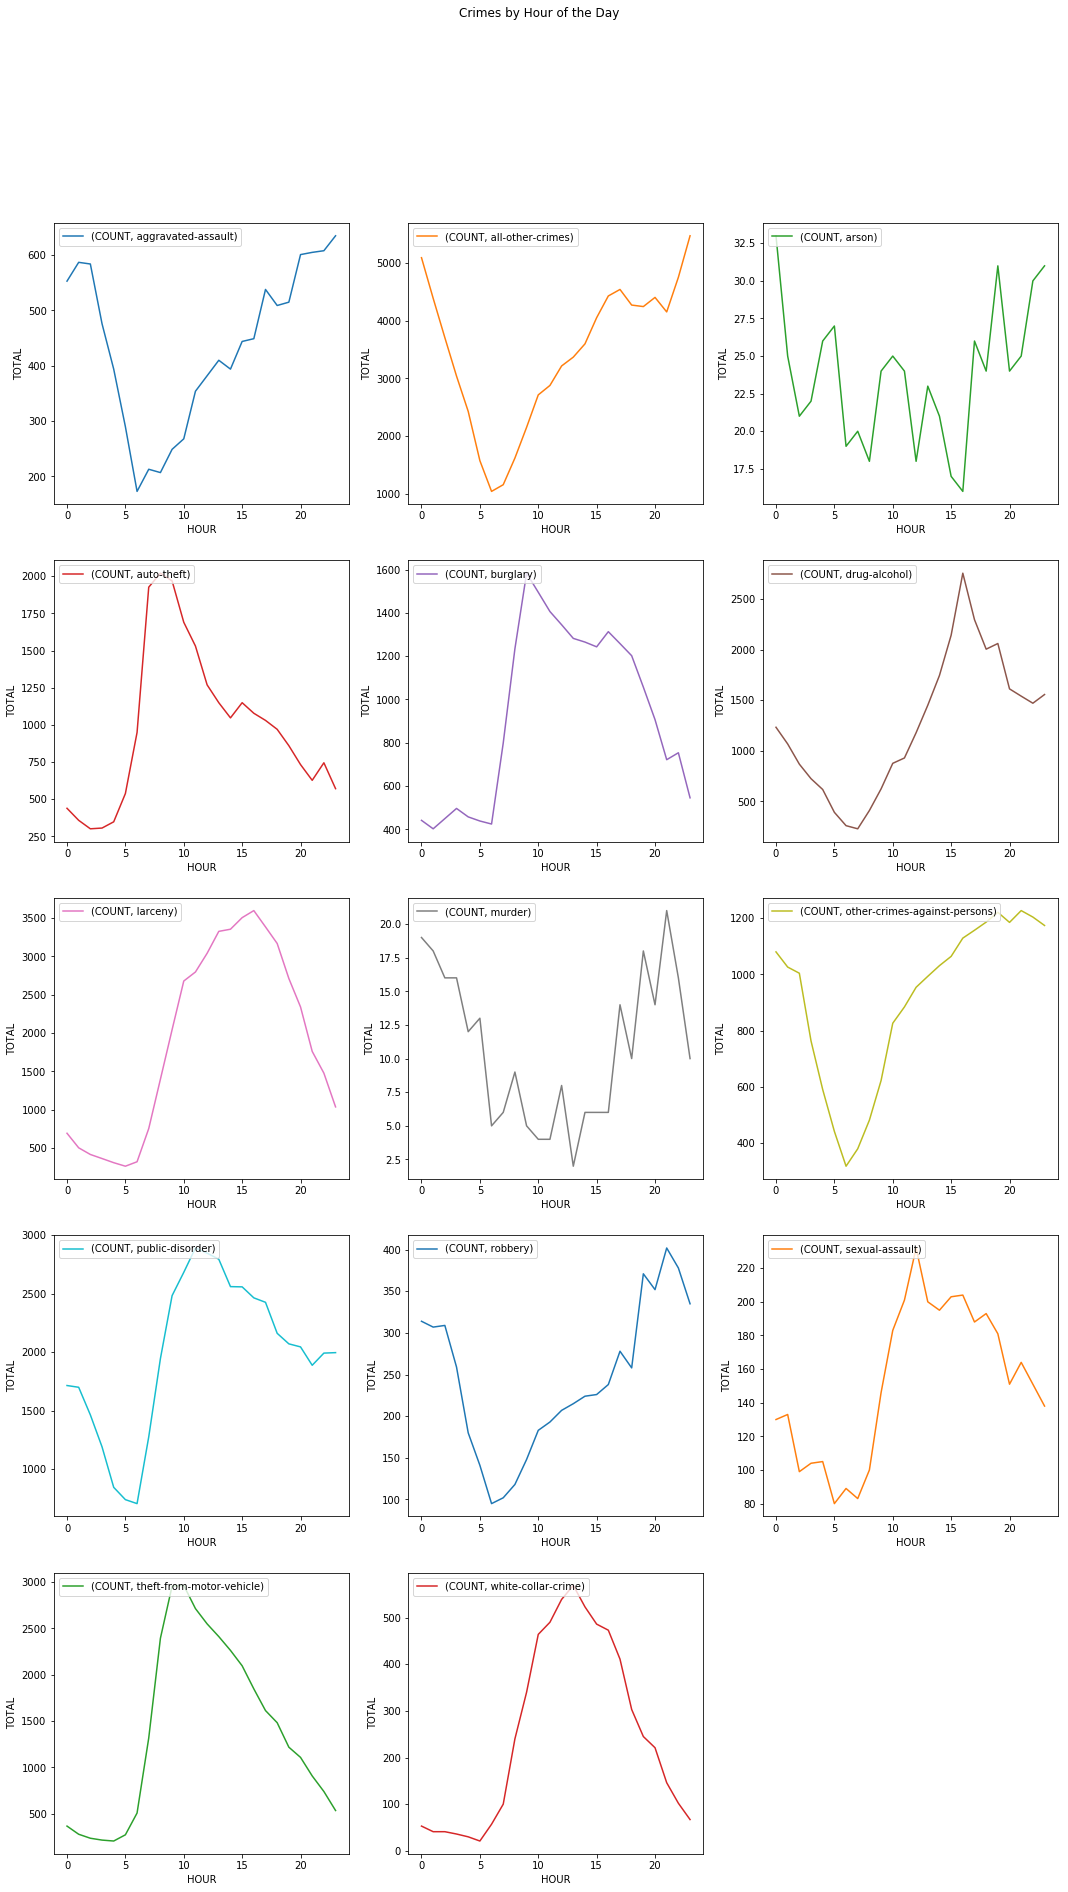

In [665]:
temp=denver_crime[['HOUR_REPORTED','OFFENSE_CATEGORY_ID']].groupby([denver_crime.HOUR_REPORTED, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='HOUR_REPORTED',axis=1)
temp.columns=['COUNT']
temp.index=temp.index.rename('HOUR',level=0)

temp=temp.unstack(level=1)
fig=temp.plot(kind='line', figsize=(18,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)
for row in fig:
    for item in row:
        item.set_ylabel('TOTAL')
        item.legend(loc='upper left')
plt.suptitle('Crimes by Hour of the Day')
plt.show()



There are some interesting trends here. First and formost, it eems like most crimes occur betwwen 8 AM and 8 PM with a noticeable dip in crime from 1 AM to 5 AM. Different types of crimes seem to be prevalent at different times of the day. aggravated-assualt, robbery, and other-crimes-against-persons seem to be most common late at night, betwen 10 PM and 2 AM. Auto-theft, theft-from-notor-vehicle, and larceny seem to be most common from 9 AM to 5 PM, which is also when people are at work. Since thefts have increased significantly over the past five years, reminding people to lock their cars and possessions before going to work may help address some of this crime. the crimes of murder and arson are too infrequent to come up with a meaningful trend statement.

<b><font size=3> Crimes by District</b></font>

The above section focused on crime trends temporally. In this section, I'll focus on crimes by district, while also breaking up those crimes by yar. This should tell us which districts are seeing crime rates increase, and what types of crimes are increasing. Also, by breaking crimes up by district we'll be able to see if certain districts have an abnormally large amounts of particular crimes. To start, I'll take a look at total crime trends for each district over the past five years.

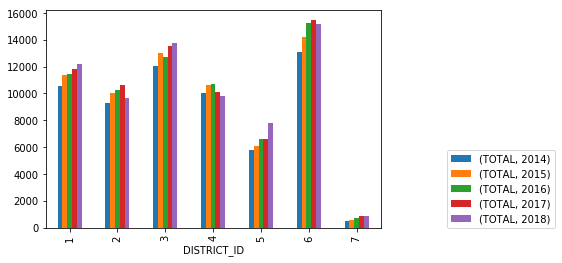

In [672]:
#analyze crime by district in each of the past five years
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID']].groupby([denver_crime.REPORTED_DATE.dt.year, denver_crime.DISTRICT_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['TOTAL']
temp=temp.unstack(level=0)
temp.plot(kind='bar',stacked=False)
plt.legend(loc=(1.2,0))
plt.show()

Districts 6, 3, and 1 are the largest, while district 7 is the smallest by a large margin. Crime seems to be trending upward over time in every district wih the exception of district 4 and possibly district 2, though in the latter case the data isn't conclusive.

Next let's take a look at the prevalence of different types of crimes in each district. We would expect those distributions to be similar to the above distribution. If that turns out not to be the case it would suggest that the crime is dispraportionately represented in that district.

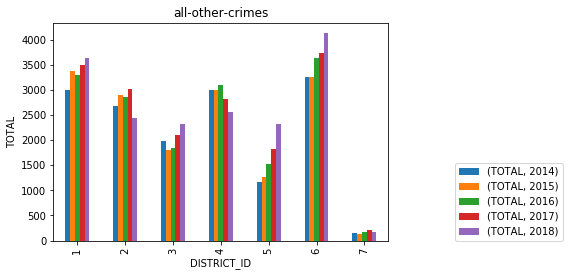

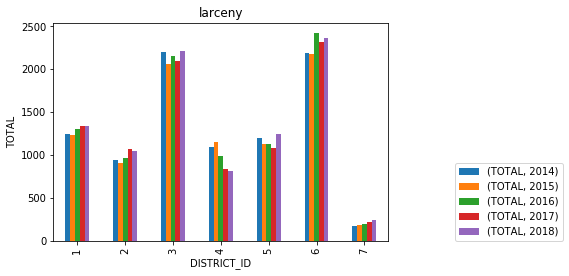

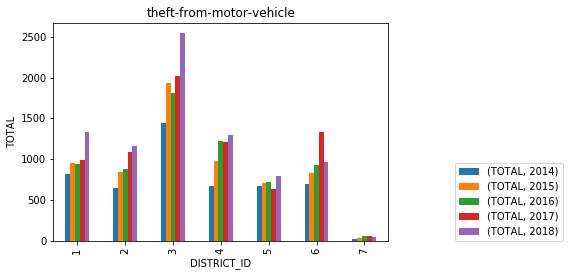

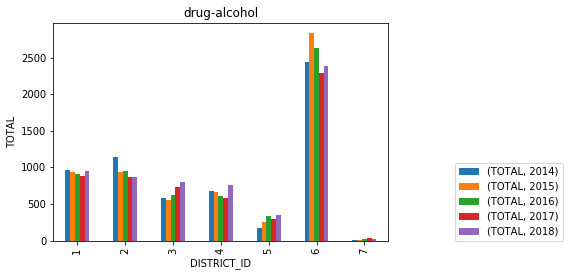

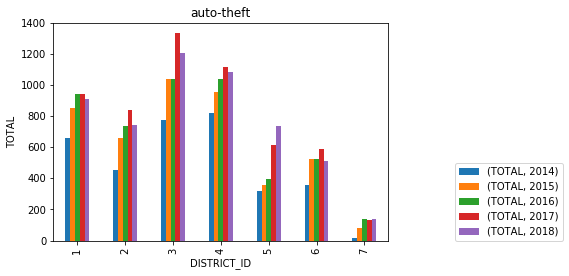

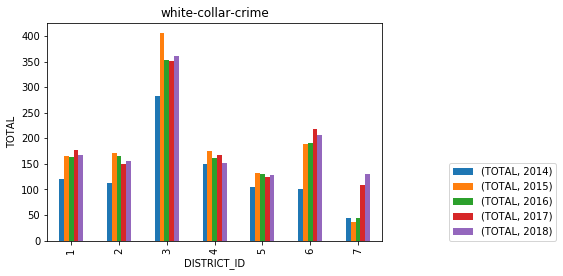

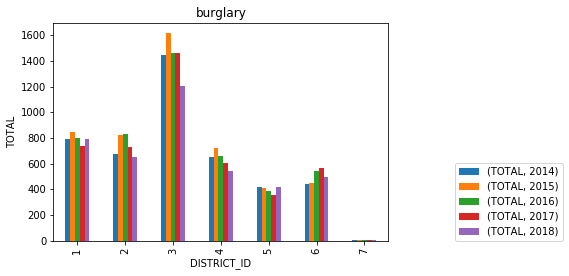

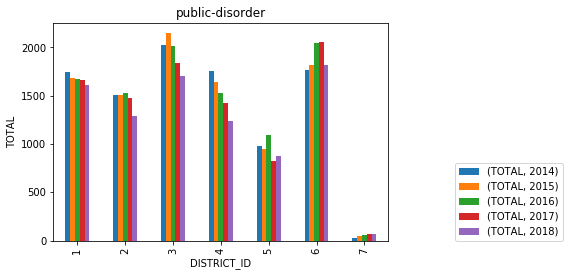

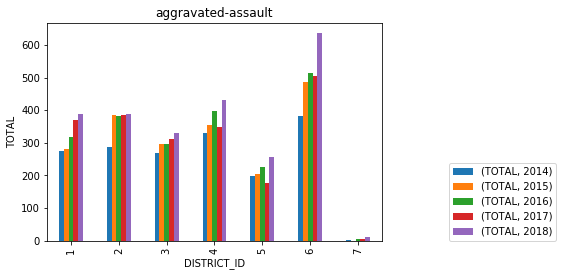

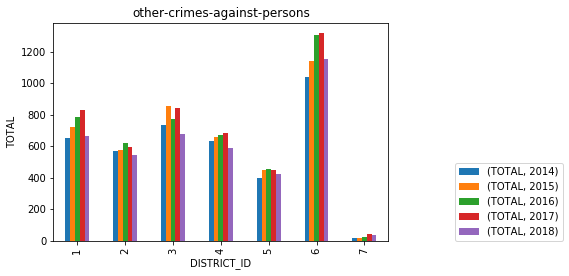

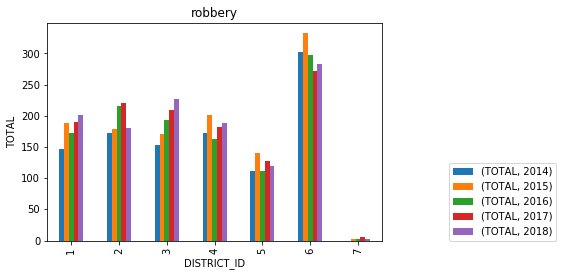

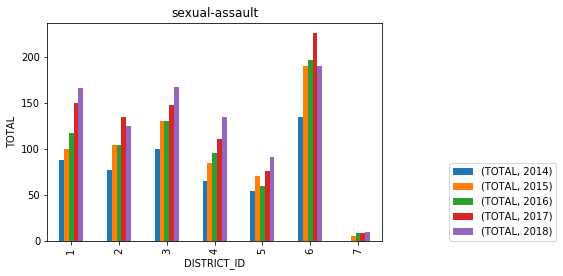

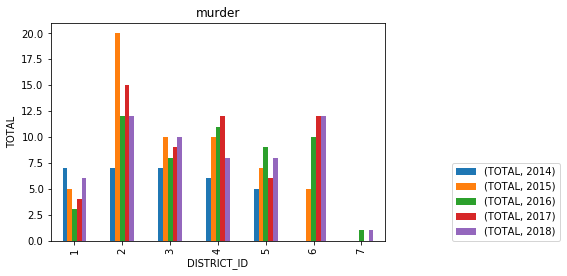

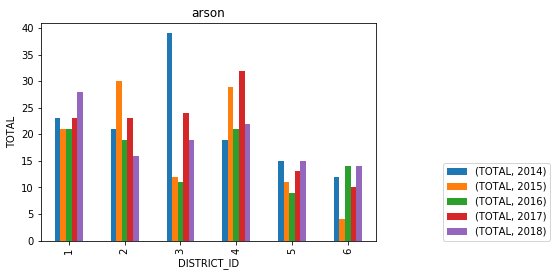

In [683]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for offense in denver_crime.OFFENSE_CATEGORY_ID.unique():
    temp2=temp[temp['OFFENSE_CATEGORY_ID']==offense].drop('OFFENSE_CATEGORY_ID', axis=1)
    temp2=temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.DISTRICT_ID]).agg('count')
    temp2.columns= ['TOTAL']
    temp2=temp2.unstack(level=0)
    temp2=temp2.plot(kind='bar')
    plt.ylabel('TOTAL')
    plt.legend(loc=(1.2,0))
    plt.title(offense)
    


It seems that district 3 is the center for theivery. It has very high rates of larceny, auto-theft,theft-from-motor-vehicles, white-collar-crime, and burglary. District 6 is the the hotspot for drug-alcohol crimes and also sports slightly higher than expected rates of aggravated-assualt and sexual-assualt. District 2 has very high murder rates which is strange given it is a relatively small district.

<font size=3><b> Heat Maps</b></font>



In this final section, I will generate some heatmps to help visualize the physical locations of crimes in Denver. In addition, I will create a function that will let you generate your own heatmaps as you see fit! I will first create the function I use to generate the heatmaps, then create several heatmaps myself, and then convey how you could create your own heatmaps!

In [669]:
# This function lets you create your own heatmaps using the provided latitude and longitude coordinates
# the function parameters filter denver_crime by its columns. pass in a tuple of (column_name,column_value) and it 
# will create a heatmap with the entries that satisfy the condition. You can have as many filters as you'd like
def heatmap_creator(*args):
    #filter out all entries with no Lat/Lon data
    check_for_coordinates=denver_crime['GEO_LAT'].isna()|denver_crime['GEO_LON'].isna()
    temp=denver_crime[~check_for_coordinates]
    #filter based on the provided parameters
    for item in args:
        a,b=item
        temp=temp[temp[a]==b]
        print(str(a)+': '+str(b))
    #Generate heatmap
    hm_prep=temp[['GEO_LAT','GEO_LON']].as_matrix()
    m = folium.Map(location=[39.73,-104.90], tiles='Stamen Toner',zoom_start=11, control_scale=True)
    m.add_children(plugins.HeatMap(hm_prep,radius=15))
    return display(m)


Above, I created the heatmap generating function. The heatmap has interactive zoom and uses javascript, so javascript must be enabled to see the heatmap. To read the heatmap, consider red areas to indicate many crimes, blue areas to meaan few crimes, and blank white areas to mean no crimes.

In [682]:
heatmap_creator(('OFFENSE_CATEGORY_ID','burglary'))

OFFENSE_CATEGORY_ID: burglary


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


In [678]:
heatmap_creator(('OFFENSE_CATEGORY_ID','drug-alcohol'))

OFFENSE_CATEGORY_ID: drug-alcohol


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


In [680]:
heatmap_creator(('YEAR_REPORTED',2015),('OFFENSE_CATEGORY_ID','drug-alcohol'))

YEAR_REPORTED: 2015
OFFENSE_CATEGORY_ID: drug-alcohol


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


In [671]:
heatmap_creator(('MONTH_REPORTED',7),('YEAR_REPORTED',2015),('OFFENSE_CATEGORY_ID','drug-alcohol'))

MONTH_REPORTED: 7
YEAR_REPORTED: 2015
OFFENSE_CATEGORY_ID: drug-alcohol


/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  app.launch_new_instance()


Those are a few sample heatmaps. In order to create your own, open this notebook in Jupyter Notebook, use the function heatmap_creator, and pass it a column-value pair as a tuple. heatmap_creator will filter Denver's total crime data by the criteria you submit, so if you run the code heatmap_creator(('OFFENSE_CATEGORY_ID','burglary')), it will construct a heatmap of all burglary type crimes recorded in Denver. You can even add multiple filters e.g. if you were to run heatmap_creator(('OFFENSE_CATEGORY_ID','burglary'),('YEAR_REPORTED',2015)), it would construct a heatmap of all burglaries that occured in 2015. I hope this tool proves useful, and I hope individual police departments can use it to identify crime hotspots within their precincts. 

<font size=5><b>End of EDA</font></b>

Thank you for reading through this exploratory data analysis. If there is any additional visualizations you would like, please let me know and I'll add them. I hope you saw something new, and have a great day!

<font size=3><b>Appendix</b></font>

In this section, I'm including a handful of graphs that I couldn't fit into the report, but still found interesting and may turn out useful

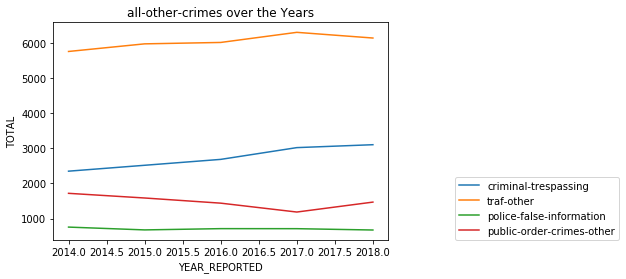

In [627]:
#all-other-crimes over the years
temp=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes']
temp=temp[['YEAR_REPORTED','OFFENSE_TYPE_ID']].groupby([temp.OFFENSE_TYPE_ID, temp.YEAR_REPORTED]).agg('count')
temp=temp.drop(labels='YEAR_REPORTED',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=0)
temp['COUNT'][['criminal-trespassing','traf-other','police-false-information','public-order-crimes-other']].plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('all-other-crimes over the Years')
plt.show()



The above graph breaks down the all-other-crimes category and shows how those crimes trended over the years. of note is that criminal trespassing is trending upwards, which may be expected given Denver's constantly increasing population.

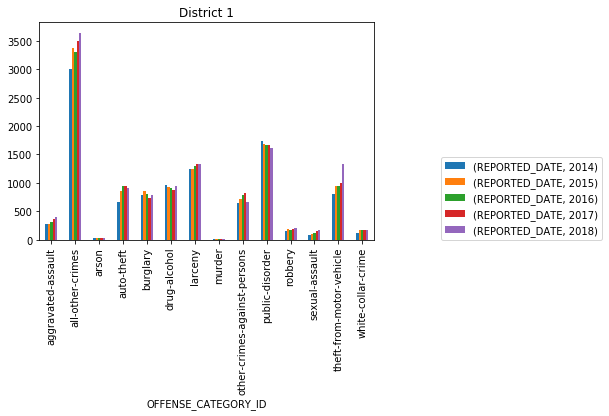

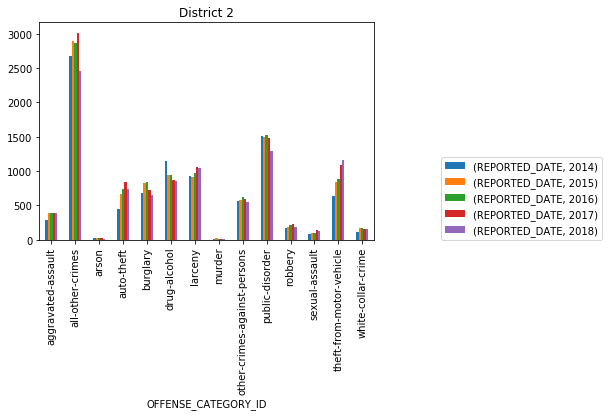

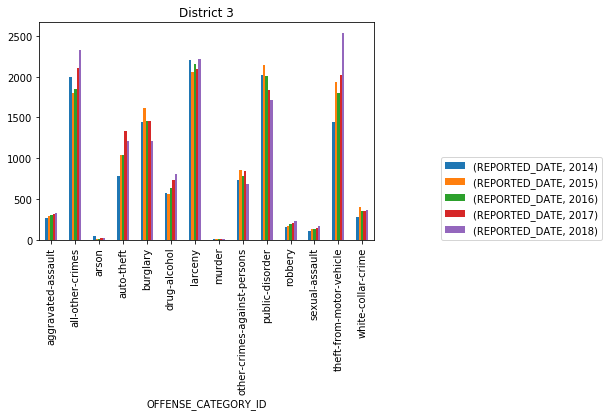

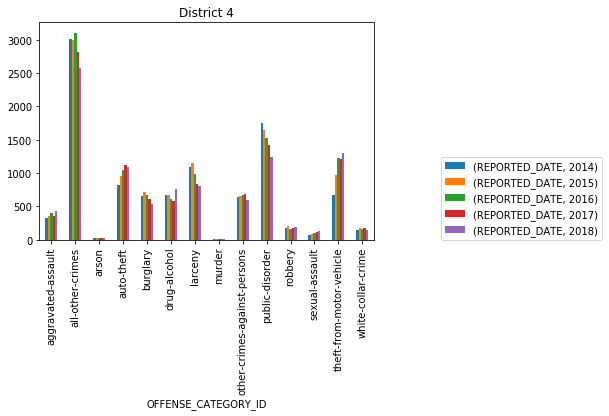

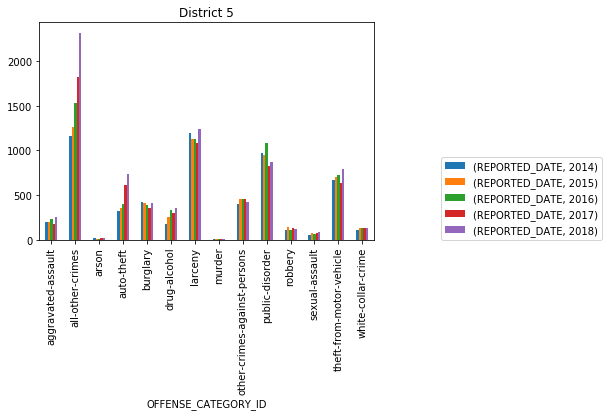

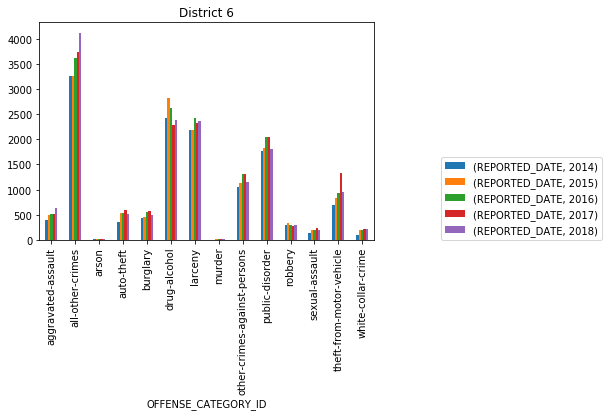

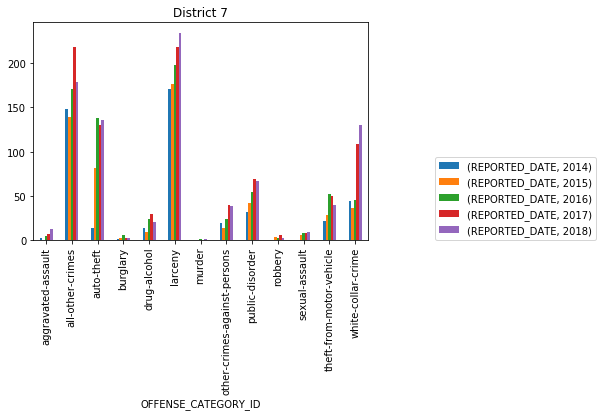

In [673]:
#crime breakdown within each district
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for district in range(1,8):
    temp2=temp[temp['DISTRICT_ID']==district].drop('DISTRICT_ID',axis=1)
    temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.OFFENSE_CATEGORY_ID]).agg('count')
    temp2=temp2.unstack(level=0).plot(kind='bar').legend(loc=(1.2,0))
    plt.title('District '+str(district))
    plt.show()

This distribution shows how crimes break down by type within each district. the data is organized differently from the district graphs earlier in the report, but they contain the same information. This orginization may be more useful to the individual police departments though; they may want a graph showcasing the crime trends in their district only.

In [685]:
denver_traffic=denver_data[denver_data['IS_TRAFFIC']==1]
check_for_coordinates=denver_traffic['GEO_LAT'].isna()|denver_traffic['GEO_LON'].isna()
temp=denver_traffic[~check_for_coordinates]
hm_prep=temp[['GEO_LAT','GEO_LON']].as_matrix()
m = folium.Map(location=[39.73,-104.90], tiles='Stamen Toner',zoom_start=11, control_scale=True)
m.add_children(plugins.HeatMap(hm_prep,radius=15))
display(m)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


the dataset also included traffic data. I wasn't really sure what I could do with it, but I ultimately decided to create a heatmap of the data. By zooming into the heatmap, you'll notice that most collisions are at intersections as you'd expect. Zooming in gives you a better visualization of the individual streets, and you'll notice some streets have more redspots than others; that indicates those streets have more collisions than others. Given the information I know, this heatmap doesn't tell me a whole lot as certain roads may have more accidents because they just have more traffic. If someone more familiar with the actual streets of Denver knows a particular intersection is ill-designed, this visualization could provide that person with supporting evidence by highlighting how many accidents occur there. Hopefully it helps